In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid
import os
import time

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 10

In [5]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Label - {}'.format(label))
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print('Label - {}, image number - {}'.format(label, img_num))
        
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image', frame)
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/aaquil/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-5-13 torch 1.11.0 CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients
Adding AutoShape... 


In [3]:
img = os.path.join('data', 'images', 'drowsy.6c4eb224-d320-11ec-8e5b-8a65d7aee116.jpg')

In [4]:
results = model(img)

In [5]:
results.print()

image 1/1: 720x1280 1 awake, 2 drowsys
Speed: 24.8ms pre-process, 146.5ms inference, 0.4ms NMS per image at shape (1, 3, 384, 640)


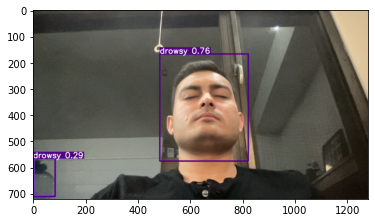

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 